In [1]:
# Import dependencies 
import pandas as pd
import sklearn

In [2]:
# Read both the training and the testing dataset using pandas
df_wildfires_training = pd.read_csv('wildfires_training.csv')
df_wildfires_test = pd.read_csv('wildfires_test.csv')

# Independent_variable and target variable
independent_variables = ['year', 'temp', 'humidity', 'rainfall', 'drought_code', 'buildup_index', 'day', 'month', 'wind_speed']
target_variable = 'fire'

In [3]:
# Prints the first five rows of the training dataset and its shape
print(df_wildfires_training.head())
print(df_wildfires_training.shape)

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    28        59       0.0          8.06           3.47    1   
1   no  2010    30        61       1.3          8.17           4.03    2   
2   no  2009    26        83      13.1          8.08           3.59    3   
3   no  2017    25        87       2.5          7.18           2.42    4   
4   no  2014    28        77       0.0         14.98           4.63    5   

   month  wind_speed  
0      6          19  
1      6          13  
2      6          22  
3      6          15  
4      6          18  
(154, 10)


In [4]:
# Training dataframe containing just the independent variables
X_train = df_wildfires_training.loc[:,independent_variables]
print(X_train.head())
print(X_train.shape)

   year  temp  humidity  rainfall  drought_code  buildup_index  day  month  \
0  2015    28        59       0.0          8.06           3.47    1      6   
1  2010    30        61       1.3          8.17           4.03    2      6   
2  2009    26        83      13.1          8.08           3.59    3      6   
3  2017    25        87       2.5          7.18           2.42    4      6   
4  2014    28        77       0.0         14.98           4.63    5      6   

   wind_speed  
0          19  
1          13  
2          22  
3          15  
4          18  
(154, 9)


In [5]:
# Training dataframe containing just the targe variable
y_train = df_wildfires_training.loc[:,target_variable]
print(y_train.head())
print(y_train.shape)

0    no
1    no
2    no
3    no
4    no
Name: fire, dtype: object
(154,)


In [6]:
# Prints the first five rows of the test dataset and its shape
print(df_wildfires_test.head())
print(df_wildfires_test.shape)

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    33        68       4.5          9.12           5.09   19   
1  yes  2009    28        56       0.0         38.17          21.21   12   
2   no  2017    30        64       0.6         15.38           6.24   24   
3   no  2007    23        74       8.3          7.36           2.27   14   
4   no  2017    31        72       0.3         30.47           5.63    7   

   month  wind_speed  
0      6          16  
1      6          18  
2      9          19  
3      9          28  
4      9          17  
(50, 10)


In [7]:
# Test dataframe containing just the independent variables
X_test = df_wildfires_test.loc[:,independent_variables]
print(X_test.head())
print(X_test.shape)

   year  temp  humidity  rainfall  drought_code  buildup_index  day  month  \
0  2015    33        68       4.5          9.12           5.09   19      6   
1  2009    28        56       0.0         38.17          21.21   12      6   
2  2017    30        64       0.6         15.38           6.24   24      9   
3  2007    23        74       8.3          7.36           2.27   14      9   
4  2017    31        72       0.3         30.47           5.63    7      9   

   wind_speed  
0          16  
1          18  
2          19  
3          28  
4          17  
(50, 9)


In [15]:
# Test dataframe containing just the targe variable
y_test = df_wildfires_test.loc[:,target_variable]
print(y_test.head())
print(y_test.shape)

0     no
1    yes
2     no
3     no
4     no
Name: fire, dtype: object
(50,)


In [11]:
# List of the features
features = X_train.columns.tolist()

## Decision Trees

Accuracy on training data: 1.0
Accuracy on testing data: 0.82


[Text(0.2692307692307692, 0.9444444444444444, 'drought_code <= 19.91\nentropy = 1.0\nsamples = 154\nvalue = [75, 79]'),
 Text(0.19230769230769232, 0.8333333333333334, 'entropy = 0.0\nsamples = 57\nvalue = [57, 0]'),
 Text(0.34615384615384615, 0.8333333333333334, 'rainfall <= 0.05\nentropy = 0.692\nsamples = 97\nvalue = [18, 79]'),
 Text(0.15384615384615385, 0.7222222222222222, 'humidity <= 69.5\nentropy = 0.319\nsamples = 69\nvalue = [4, 65]'),
 Text(0.07692307692307693, 0.6111111111111112, 'entropy = 0.0\nsamples = 52\nvalue = [0, 52]'),
 Text(0.23076923076923078, 0.6111111111111112, 'buildup_index <= 14.665\nentropy = 0.787\nsamples = 17\nvalue = [4, 13]'),
 Text(0.15384615384615385, 0.5, 'day <= 9.5\nentropy = 0.971\nsamples = 10\nvalue = [4, 6]'),
 Text(0.07692307692307693, 0.3888888888888889, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.23076923076923078, 0.3888888888888889, 'drought_code <= 35.465\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.1538461538461538

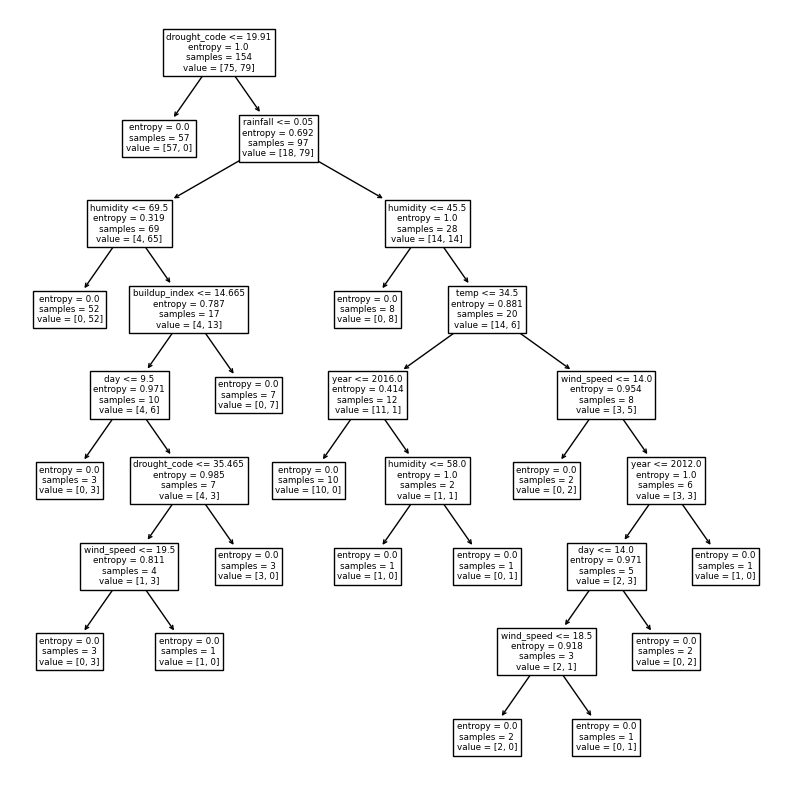

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

# Create a model using entropy as the criterion
entropy_model = DecisionTreeClassifier(criterion="entropy")
entropy_model.fit(X_train, y_train)

# Compute the accuracy on the training predictions
predictions_training = entropy_model.predict(X_train)
accuracy_training = metrics.accuracy_score(y_train, predictions_training)
print("Accuracy on training data:",accuracy_training)

# Compute the accuracy on the testing predictions
predictions_test = entropy_model.predict(X_test)
accuracy_test = metrics.accuracy_score(y_test, predictions_test)
print("Accuracy on testing data:",accuracy_test)

plt.figure(figsize=(10,10))
tree.plot_tree(entropy_model, feature_names=features)

Accuracy on training data: 1.0
Accuracy on testing data: 0.86


[Text(0.46153846153846156, 0.9375, 'drought_code <= 19.91\ngini = 0.5\nsamples = 154\nvalue = [75, 79]'),
 Text(0.38461538461538464, 0.8125, 'gini = 0.0\nsamples = 57\nvalue = [57, 0]'),
 Text(0.5384615384615384, 0.8125, 'rainfall <= 0.15\ngini = 0.302\nsamples = 97\nvalue = [18, 79]'),
 Text(0.38461538461538464, 0.6875, 'humidity <= 68.0\ngini = 0.162\nsamples = 79\nvalue = [7, 72]'),
 Text(0.3076923076923077, 0.5625, 'gini = 0.0\nsamples = 58\nvalue = [0, 58]'),
 Text(0.46153846153846156, 0.5625, 'rainfall <= 0.05\ngini = 0.444\nsamples = 21\nvalue = [7, 14]'),
 Text(0.38461538461538464, 0.4375, 'buildup_index <= 14.665\ngini = 0.346\nsamples = 18\nvalue = [4, 14]'),
 Text(0.3076923076923077, 0.3125, 'buildup_index <= 11.905\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.15384615384615385, 0.1875, 'wind_speed <= 20.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.07692307692307693, 0.0625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.23076923076923078, 0.0625, 'g

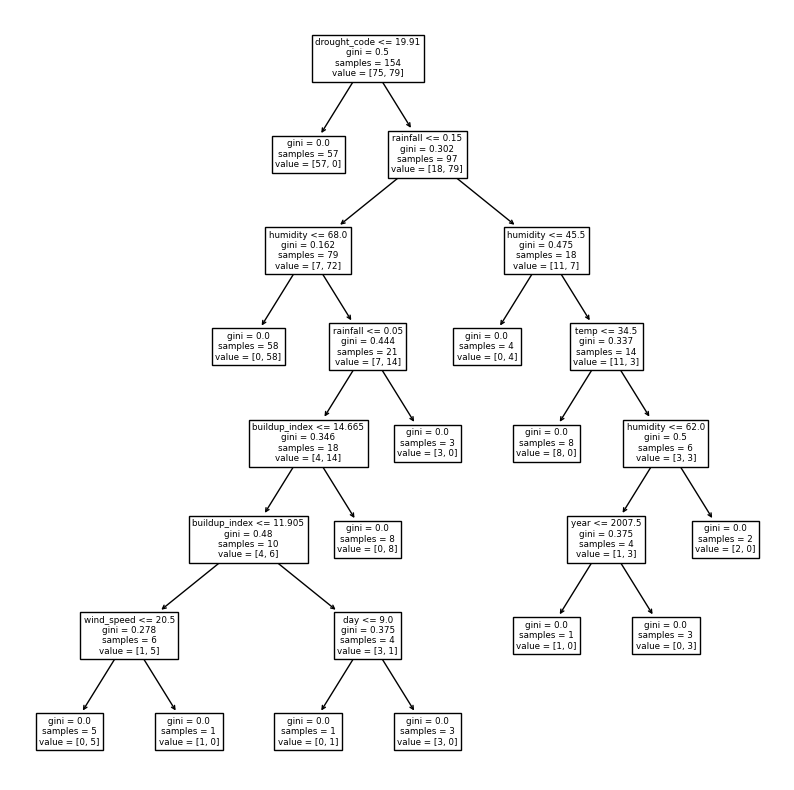

In [53]:
# Create a model using the default settings (using Gini index)
gini_index_model = DecisionTreeClassifier()
gini_index_model.fit(X_train, y_train)

# Compute the accuracy on the training predictions
predictions_training = gini_index_model.predict(X_train)
accuracy_training = metrics.accuracy_score(y_train, predictions_training)
print("Accuracy on training data:",accuracy_training)

# Compute the accuracy on the training predictions
predictions_test = gini_index_model.predict(X_test)
accuracy_test = metrics.accuracy_score(y_test, predictions_test)
print("Accuracy on testing data:",accuracy_test)

plt.figure(figsize=(10,10))
tree.plot_tree(gini_index_model,feature_names=features)

In [54]:
# List of range 1-10
one_to_ten = list(range(1,11))

In [55]:
# List of the criterions
criterion = ["entropy", "gini"]

accuracy_training_data = []
accuracy_testing_data = []

for i in criterion:

        for j in range(1, 11):
            # Create a model using the default settings (using Gini index)
            model = DecisionTreeClassifier(criterion = i, max_depth = j)
            model.fit(X_train, y_train)

            # Compute the accuracy on the training predictions
            predictions_training = model.predict(X_train)
            accuracy_training = metrics.accuracy_score(y_train, predictions_training)
            print(f"Accuracy on training data with depth {j} and criterion {i}: {accuracy_training}")
            accuracy_training_data.append(accuracy_training)

            # Compute the accuracy on the testing predictions
            predictions_test = model.predict(X_test)
            accuracy_test = metrics.accuracy_score(y_test, predictions_test)
            print(f"Accuracy on testing data with depth {j} and criterion {i}: {accuracy_test}\n")
            accuracy_testing_data.append(accuracy_test)


Accuracy on training data with depth 1 and criterion entropy: 0.8831168831168831
Accuracy on testing data with depth 1 and criterion entropy: 0.8

Accuracy on training data with depth 2 and criterion entropy: 0.8831168831168831
Accuracy on testing data with depth 2 and criterion entropy: 0.82

Accuracy on training data with depth 3 and criterion entropy: 0.935064935064935
Accuracy on testing data with depth 3 and criterion entropy: 0.86

Accuracy on training data with depth 4 and criterion entropy: 0.948051948051948
Accuracy on testing data with depth 4 and criterion entropy: 0.86

Accuracy on training data with depth 5 and criterion entropy: 0.9545454545454546
Accuracy on testing data with depth 5 and criterion entropy: 0.88

Accuracy on training data with depth 6 and criterion entropy: 0.987012987012987
Accuracy on testing data with depth 6 and criterion entropy: 0.86

Accuracy on training data with depth 7 and criterion entropy: 1.0
Accuracy on testing data with depth 7 and criterio

In [56]:
# Accuracy of the training and testing data for the entropy model
training_entropy = accuracy_training_data[0:10]
testing_entropy = accuracy_testing_data[0:10]

# Accuracy of the training and testing data for the gini model
training_gini = accuracy_training_data[10:20]
testing_gini = accuracy_testing_data[10:20]

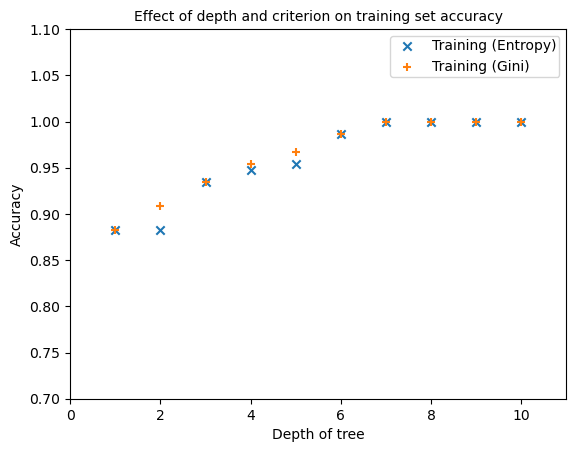

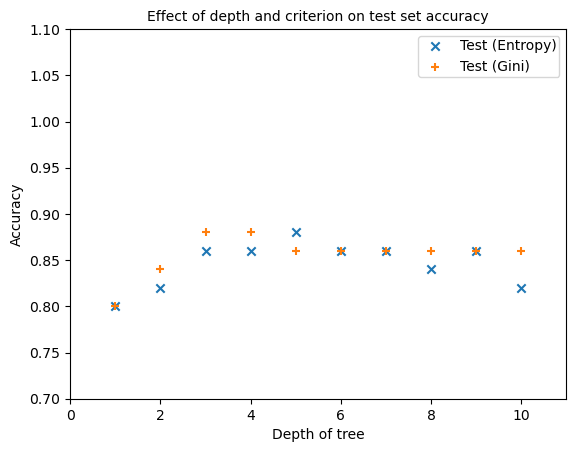

In [57]:
# Plotting the training data for both entropy and gini
plt.scatter(one_to_ten,training_entropy,marker="x")
plt.scatter(one_to_ten,training_gini,marker="+")
plt.xlim([0, 11])
plt.ylim([0.7, 1.1])
plt.xlabel("Depth of tree")
plt.ylabel("Accuracy")
legend_labels = ["Training (Entropy)","Training (Gini)"]
plt.legend(labels=legend_labels, loc=1, borderpad=0.2)
plt.title("Effect of depth and criterion on training set accuracy", fontsize=10)
plt.show()

# Plotting the testing data for both entropy and gini
plt.scatter(one_to_ten,testing_entropy,marker="x")
plt.scatter(one_to_ten,testing_gini,marker="+")
plt.xlim([0, 11])
plt.ylim([0.7, 1.1])
plt.xlabel("Depth of tree")
plt.ylabel("Accuracy")
legend_labels = ["Test (Entropy)","Test (Gini)"]
plt.legend(labels=legend_labels, loc=1, borderpad=0.2)
plt.title("Effect of depth and criterion on test set accuracy", fontsize=10)
plt.show()

In [68]:
# List of the criterions
criterion = ["entropy", "gini"]

accuracy_training_data_2 = []
accuracy_testing_data_2 = []

for i in criterion:

        for j in range(11, 22):
            # create a model using the default settings (using Gini index)
            model_2 = DecisionTreeClassifier(criterion = i, max_depth = j)
            model_2.fit(X_train, y_train)

            # compute the accuracy on the training predictions
            predictions_training_2 = model_2.predict(X_train)
            accuracy_training_2 = metrics.accuracy_score(y_train, predictions_training)
            #print(f"Accuracy on training data with depth {j} and criterion {i}: {accuracy_training}")
            accuracy_training_data_2.append(accuracy_training)


In [69]:
# Accuracy of the training  data for the entropy model_2
training_entropy_2 = accuracy_training_data_2[0:10]
testing_entropy_2 = accuracy_testing_data_2[0:10]

In [70]:
# List of range 11-20
eleven_to_twenty = list(range(11,21))

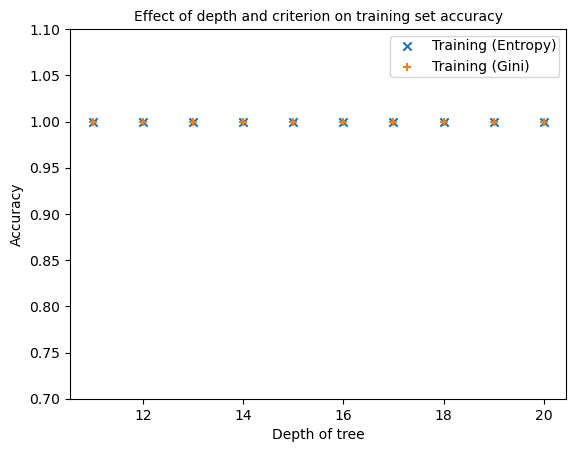

In [71]:
# Plotting the training data for entropy model_2
plt.scatter(eleven_to_twenty,training_entropy_2,marker="x")
plt.scatter(eleven_to_twenty,training_gini_2,marker="+")
plt.ylim([0.7, 1.1])
plt.xlabel("Depth of tree")
plt.ylabel("Accuracy")
legend_labels = ["Training (Entropy)","Training (Gini)"]
plt.legend(labels=legend_labels, loc=1, borderpad=0.2)
plt.title("Effect of depth and criterion on training set accuracy", fontsize=10)
plt.show()


## Support Vector Machines (SVMs)

In [12]:
from sklearn.svm import SVC
from sklearn import metrics

In [9]:
X_train_subset = X_train[["drought_code", "wind_speed"]]
X_test_subset = X_test[["drought_code", "wind_speed"]]

In [16]:
# Create an SVM classifier
svm = SVC(kernel='rbf', C=1)

# Train the classifier
svm.fit(X_train_subset, y_train)

# Compute the accuracy on the training predictions
svm_predictions_training = svm.predict(X_train_subset)
svm_accuracy_training = metrics.accuracy_score(y_train, svm_predictions_training)
print("Accuracy on training data:",svm_accuracy_training)

# Compute the accuracy on the testing predictions
svm_predictions_test = svm.predict(X_test_subset)
svm_accuracy_test = metrics.accuracy_score(y_test, svm_predictions_test)
print("Accuracy on testing data:",svm_accuracy_test)

Accuracy on training data: 0.8441558441558441
Accuracy on testing data: 0.74


In [19]:
d = {'yes': 1, 'no': 0}
y_train_numerical = y_train.map(d)

In [20]:
y_train_numerical

0      0
1      0
2      0
3      0
4      0
      ..
149    1
150    0
151    0
152    0
153    0
Name: fire, Length: 154, dtype: int64

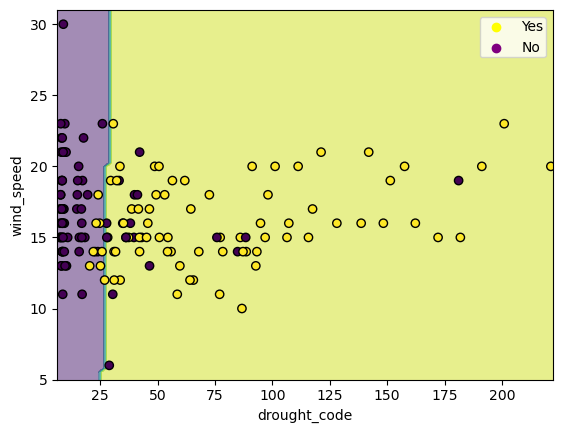

In [21]:
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
     svm, X_train_subset, response_method="predict",
     xlabel="drought_code", ylabel="wind_speed",
     alpha=0.5,
 )

ax = disp.ax_
scatter = ax.scatter(X_train["drought_code"], X_train["wind_speed"], c=y_train_numerical, edgecolor="k")

scatter = ax.scatter([], [], label='Yes', color='yellow')
scatter = ax.scatter([], [], label='No', color='purple')

ax.legend(loc=1, borderpad=0.2)

In [75]:
kernel = ["linear", "poly", "rbf"]

svm1_accuracy_training_data = []
svm1_accuracy_testing_data = []

for i in kernel:

        for j in range(1, 11):
            # Create a model using all the kernels and c values from 1-10
            svm1 = SVC(kernel = i, C= j)
            svm1.fit(X_train, y_train)

            # Compute the accuracy on the training predictions
            svm1_predictions_training = svm1.predict(X_train)
            svm1_accuracy_training = metrics.accuracy_score(y_train, svm1_predictions_training)
            print(f"Accuracy on training data with C {j} and kernel {i}: {svm1_accuracy_training}")
            svm1_accuracy_training_data.append(svm1_accuracy_training)

            svm1_predictions_test = svm1.predict(X_test)
            svm1_accuracy_test = metrics.accuracy_score(y_test, svm1_predictions_test)
            print(f"Accuracy on testing data with C {j} and kernel {i}: {svm1_accuracy_test}\n")
            svm1_accuracy_testing_data.append(svm1_accuracy_test)


Accuracy on training data with C 1 and kernel linear: 0.9155844155844156
Accuracy on testing data with C 1 and kernel linear: 0.88

Accuracy on training data with C 2 and kernel linear: 0.9155844155844156
Accuracy on testing data with C 2 and kernel linear: 0.88

Accuracy on training data with C 3 and kernel linear: 0.9155844155844156
Accuracy on testing data with C 3 and kernel linear: 0.82

Accuracy on training data with C 4 and kernel linear: 0.922077922077922
Accuracy on testing data with C 4 and kernel linear: 0.88

Accuracy on training data with C 5 and kernel linear: 0.8831168831168831
Accuracy on testing data with C 5 and kernel linear: 0.84

Accuracy on training data with C 6 and kernel linear: 0.8961038961038961
Accuracy on testing data with C 6 and kernel linear: 0.86

Accuracy on training data with C 7 and kernel linear: 0.9155844155844156
Accuracy on testing data with C 7 and kernel linear: 0.92

Accuracy on training data with C 8 and kernel linear: 0.8961038961038961
Accu

In [78]:
# Accuracy of the training and testing data for the linear model
training_linear = svm1_accuracy_training_data[0:10]
testing_linear = svm1_accuracy_testing_data[0:10]

# Accuracy of the training and testing data for the poly model
training_poly = svm1_accuracy_training_data[10:20]
testing_poly = svm1_accuracy_testing_data[10:20]

# Accuracy of the training and testing data for the rbf model
training_rbf = svm1_accuracy_training_data[20:30]
testing_rbf = svm1_accuracy_testing_data[20:30]

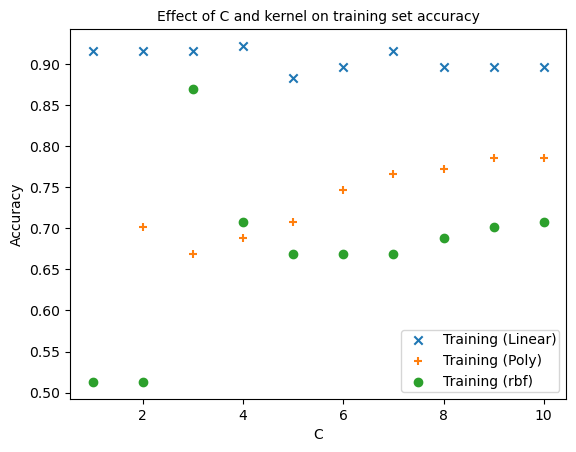

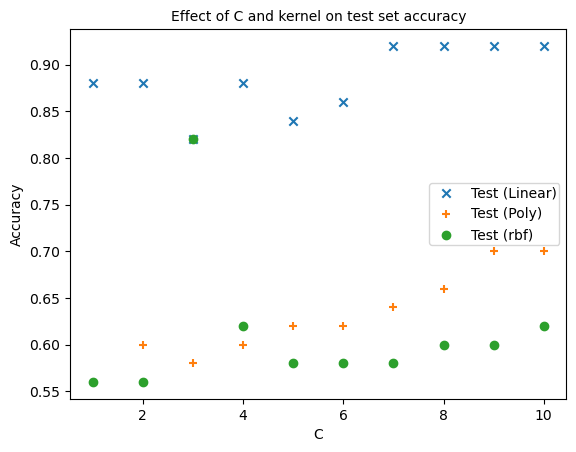

In [82]:
# Plotting training data for linear, poly and rbf
plt.scatter(one_to_ten,training_linear,marker="x")
plt.scatter(one_to_ten,training_poly,marker="+")
plt.scatter(one_to_ten,training_rbf,marker="o")
plt.xlabel("C")
plt.ylabel("Accuracy")
legend_labels = ["Training (Linear)","Training (Poly)","Training (rbf)"]
plt.legend(labels=legend_labels, loc="lower right", borderpad=0.2)
plt.title("Effect of C and kernel on training set accuracy", fontsize=10)
plt.show()

# Plotting testing data for linear, poly and rbf
plt.scatter(one_to_ten,testing_linear,marker="x")
plt.scatter(one_to_ten,testing_poly,marker="+")
plt.scatter(one_to_ten,testing_rbf,marker="o")
#plt.xlim([0, 11])
#plt.ylim([0.7, 1.1])
plt.xlabel("C")
plt.ylabel("Accuracy")
legend_labels = ["Test (Linear)","Test (Poly)","Test (rbf)"]
plt.legend(labels=legend_labels, loc="center right", borderpad=0.2)
plt.title("Effect of C and kernel on test set accuracy", fontsize=10)
plt.show()